In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [47]:
n_dots = 200

X = np.linspace(-2 * np.pi, 2 * np.pi, n_dots)
Y = np.sin(X) + 0.2 * np.random.rand(n_dots) - 0.1
X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1);

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

def polynomial_model(degree=1):
    polynomial_features = PolynomialFeatures(degree=degree,
                                             include_bias=False)
    linear_regression = LinearRegression(normalize=True)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    return pipeline

In [49]:
from sklearn.metrics import mean_squared_error

degrees = [2, 3, 5, 10]
results = []
for d in degrees:
    model = polynomial_model(degree=d)
    model.fit(X, Y)
    train_score = model.score(X, Y)
    mse = mean_squared_error(Y, model.predict(X))
    results.append({"model": model, "degree": d, "score": train_score, "mse": mse})
for r in results:
    print("degree: {}; train score: {}; mean squared error: {}".format(r["degree"], r["score"], r["mse"]))

degree: 2; train score: 0.147285454656; mean squared error: 0.42388701419
degree: 3; train score: 0.271740750281; mean squared error: 0.36201990526
degree: 5; train score: 0.895448999212; mean squared error: 0.0519726229563
degree: 10; train score: 0.993239572763; mean squared error: 0.00336062910102


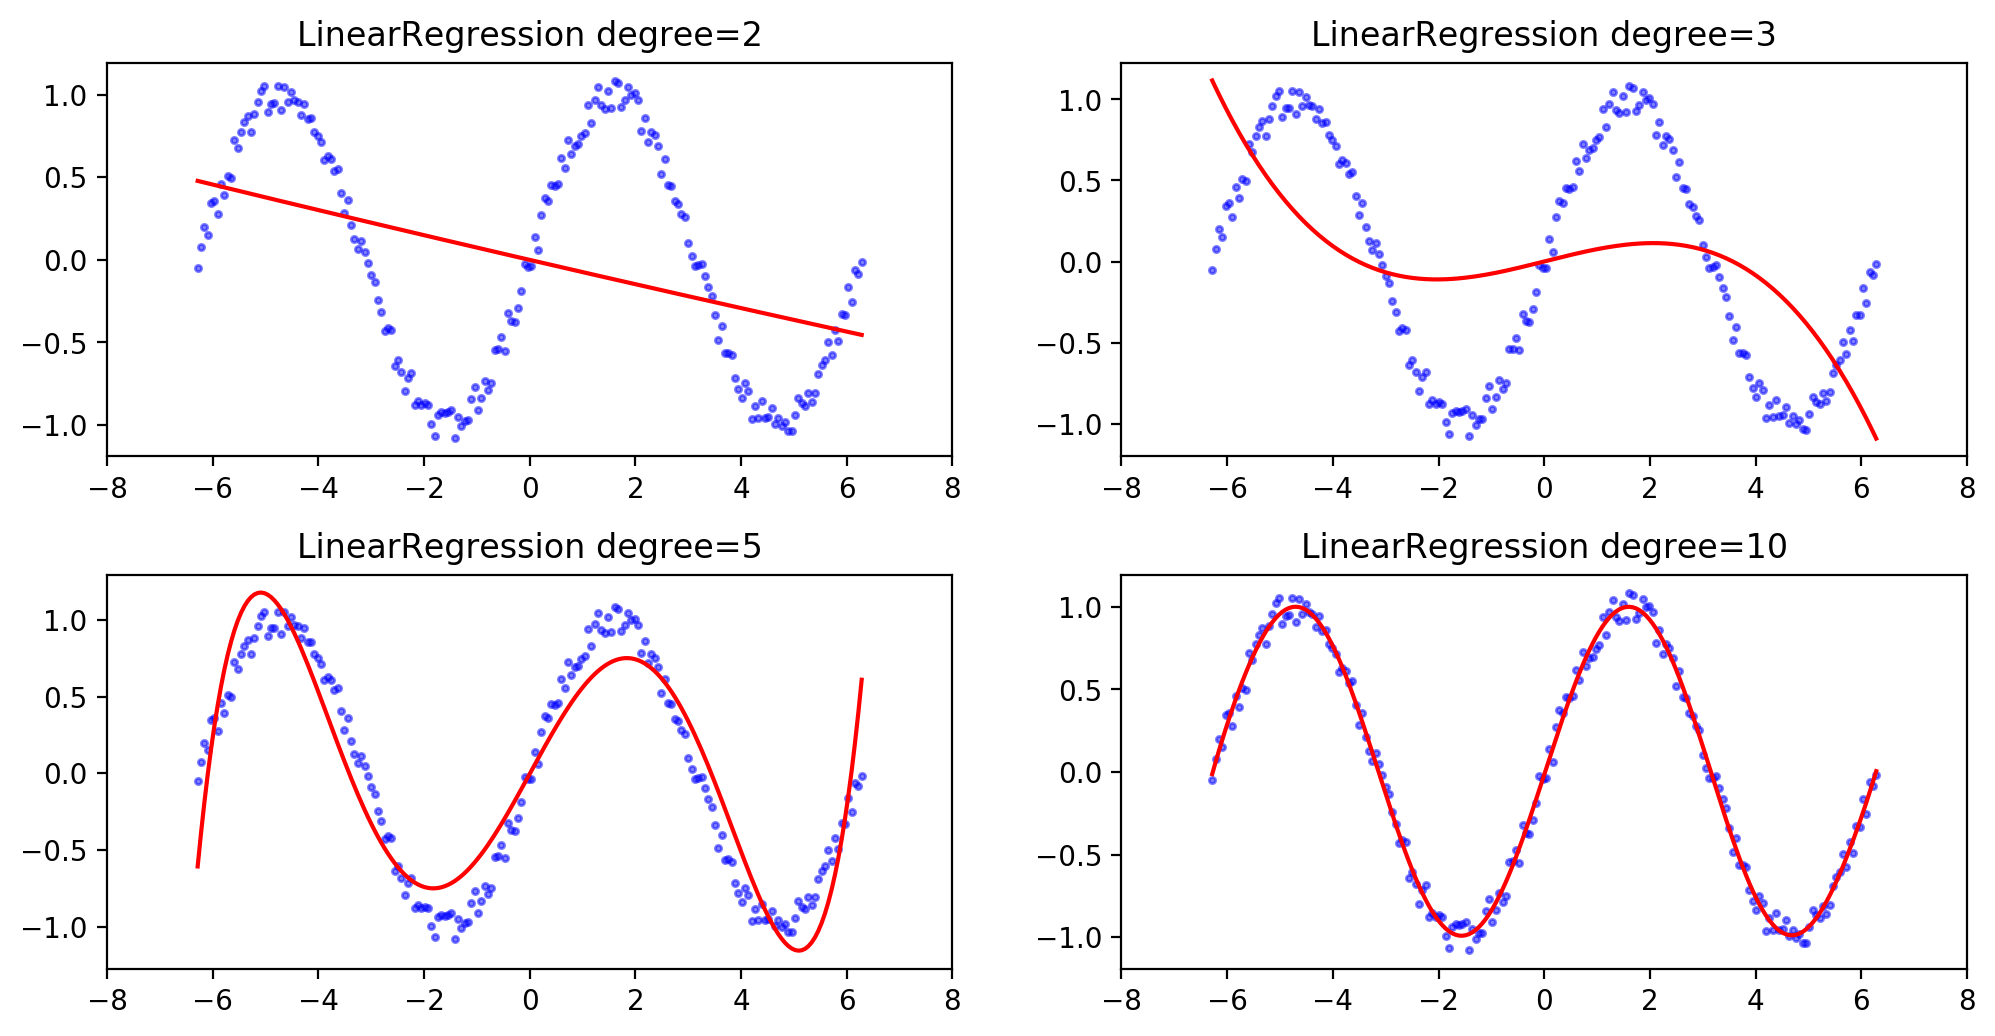

In [50]:
from matplotlib.figure import SubplotParams

plt.figure(figsize=(12, 6), dpi=200, subplotpars=SubplotParams(hspace=0.3))
for i, r in enumerate(results):
    fig = plt.subplot(2, 2, i+1)
    plt.xlim(-8, 8)
    plt.title("LinearRegression degree={}".format(r["degree"]))
    plt.scatter(X, Y, s=5, c='b', alpha=0.5)
    plt.plot(X, r["model"].predict(X), 'r-')